<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/cifa10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
lab_list = ["'airplane",									
"automobile",							
"bird",										
"cat",										
"deer",										
"dog",										
'frog',										
"horse",										
'ship',										
"truck'"]

dog


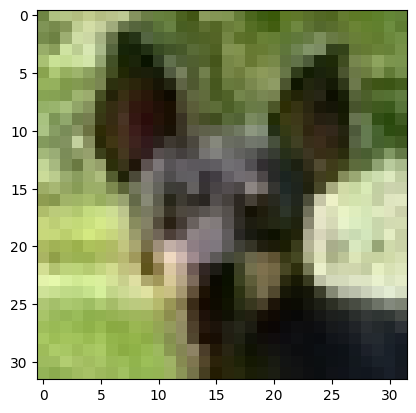

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
idx = 2500
# 灰階圖片(0: 黑色 255: 白色)
print(lab_list[y_train[idx]])
plt.imshow(x_train[idx])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
layers = [
    # kernel 9 * channel 3 * layers 64 + 64 bias
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # kernel 9 * channel 64 * layers 128 + 128 bias
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # kernel 9 * channel 128 * layers 256 + 256 bias
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # kernel 9 * channel 128 * layers 256 + 256 bias
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 +10
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [9]:
# x:0~1
# y:配合loss這邊做sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [10]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [11]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True), # find the best val_loss
    EarlyStopping(patience=5, restore_best_weights=True) # ealystop
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 489s 1s/step - loss: 1.5392 - accuracy: 0.4287 - val_loss: 1.1527 - val_accuracy: 0.5810
Epoch 2/40
450/450 [==============================] - 475s 1s/step - loss: 1.0729 - accuracy: 0.6158 - val_loss: 0.9108 - val_accuracy: 0.6814
Epoch 3/40
450/450 [==============================] - 463s 1s/step - loss: 0.8528 - accuracy: 0.6995 - val_loss: 0.8577 - val_accuracy: 0.6994
Epoch 4/40
450/450 [==============================] - 471s 1s/step - loss: 0.7176 - accuracy: 0.7478 - val_loss: 0.6936 - val_accuracy: 0.7610
Epoch 5/40
450/450 [==============================] - 472s 1s/step - loss: 0.6093 - accuracy: 0.7874 - val_loss: 0.6865 - val_accuracy: 0.7580
Epoch 6/40
450/450 [==============================] - 462s 1s/step - loss: 0.5115 - accuracy: 0.8213 - val_loss: 0.6835 - val_accuracy: 0.7648
Epoch 7/40
450/450 [==============================] - 462s 1s/step - loss: 0.4281 - accuracy: 0.8512 - val_loss: 0.6290 - val_accuracy: 0.7914

In [ ]:
model.evaluate(x_test_norm, y_test)

In [12]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(lab_list[i]) for i in range(10)],
       columns=["{}(pred)".format(lab_list[i]) for i in range(10)])

313/313 [==============================] - 22s 70ms/step


,'airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck'(pred)
'airplane(true),830,13,44,14,13,2,5,15,47,17
automobile(true),17,878,2,2,1,3,3,1,31,62
bird(true),56,4,698,43,87,54,33,17,6,2
cat(true),23,10,80,575,45,145,49,47,12,14
deer(true),17,3,64,51,729,32,26,65,12,1
dog(true),12,5,46,130,39,677,20,55,8,8
frog(true),8,5,56,71,24,9,810,6,8,3
horse(true),14,0,31,23,36,39,4,841,3,9
ship(true),48,15,19,7,6,2,1,6,883,13
truck'(true),38,66,6,7,1,6,3,16,30,827


[2 4 7 4 2 3 1 0 7 2 2 3 3 5 5 4 0 7 4 8 6 2 6 2 7 5 7 2 3 0 8 3 5 5 6 7 9
 0 2 6 0 8 5 0 0 3 7 3 2 3 2 7 8 8 2 6 8 3 3 8 0 2 4 9 8 1 5 4 1 3 2 7 4 7
 5 0 1 4 2 8 0 5 0 5 9 9 7 7 7 3 6 3 6 4 3 7 3 9 8 2]
[6 5 4 5 4 5 2 4 9 6 0 7 4 6 3 2 9 5 2 7 3 3 4 6 3 7 3 0 5 2 9 6 3 2 5 4 5
 3 4 2 1 0 7 4 8 6 4 6 4 7 6 0 3 9 4 3 0 5 7 0 2 5 3 0 0 9 3 6 8 5 3 4 2 5
 3 1 3 8 0 0 9 2 8 2 0 3 3 0 3 5 3 4 0 2 5 3 2 1 5 3]


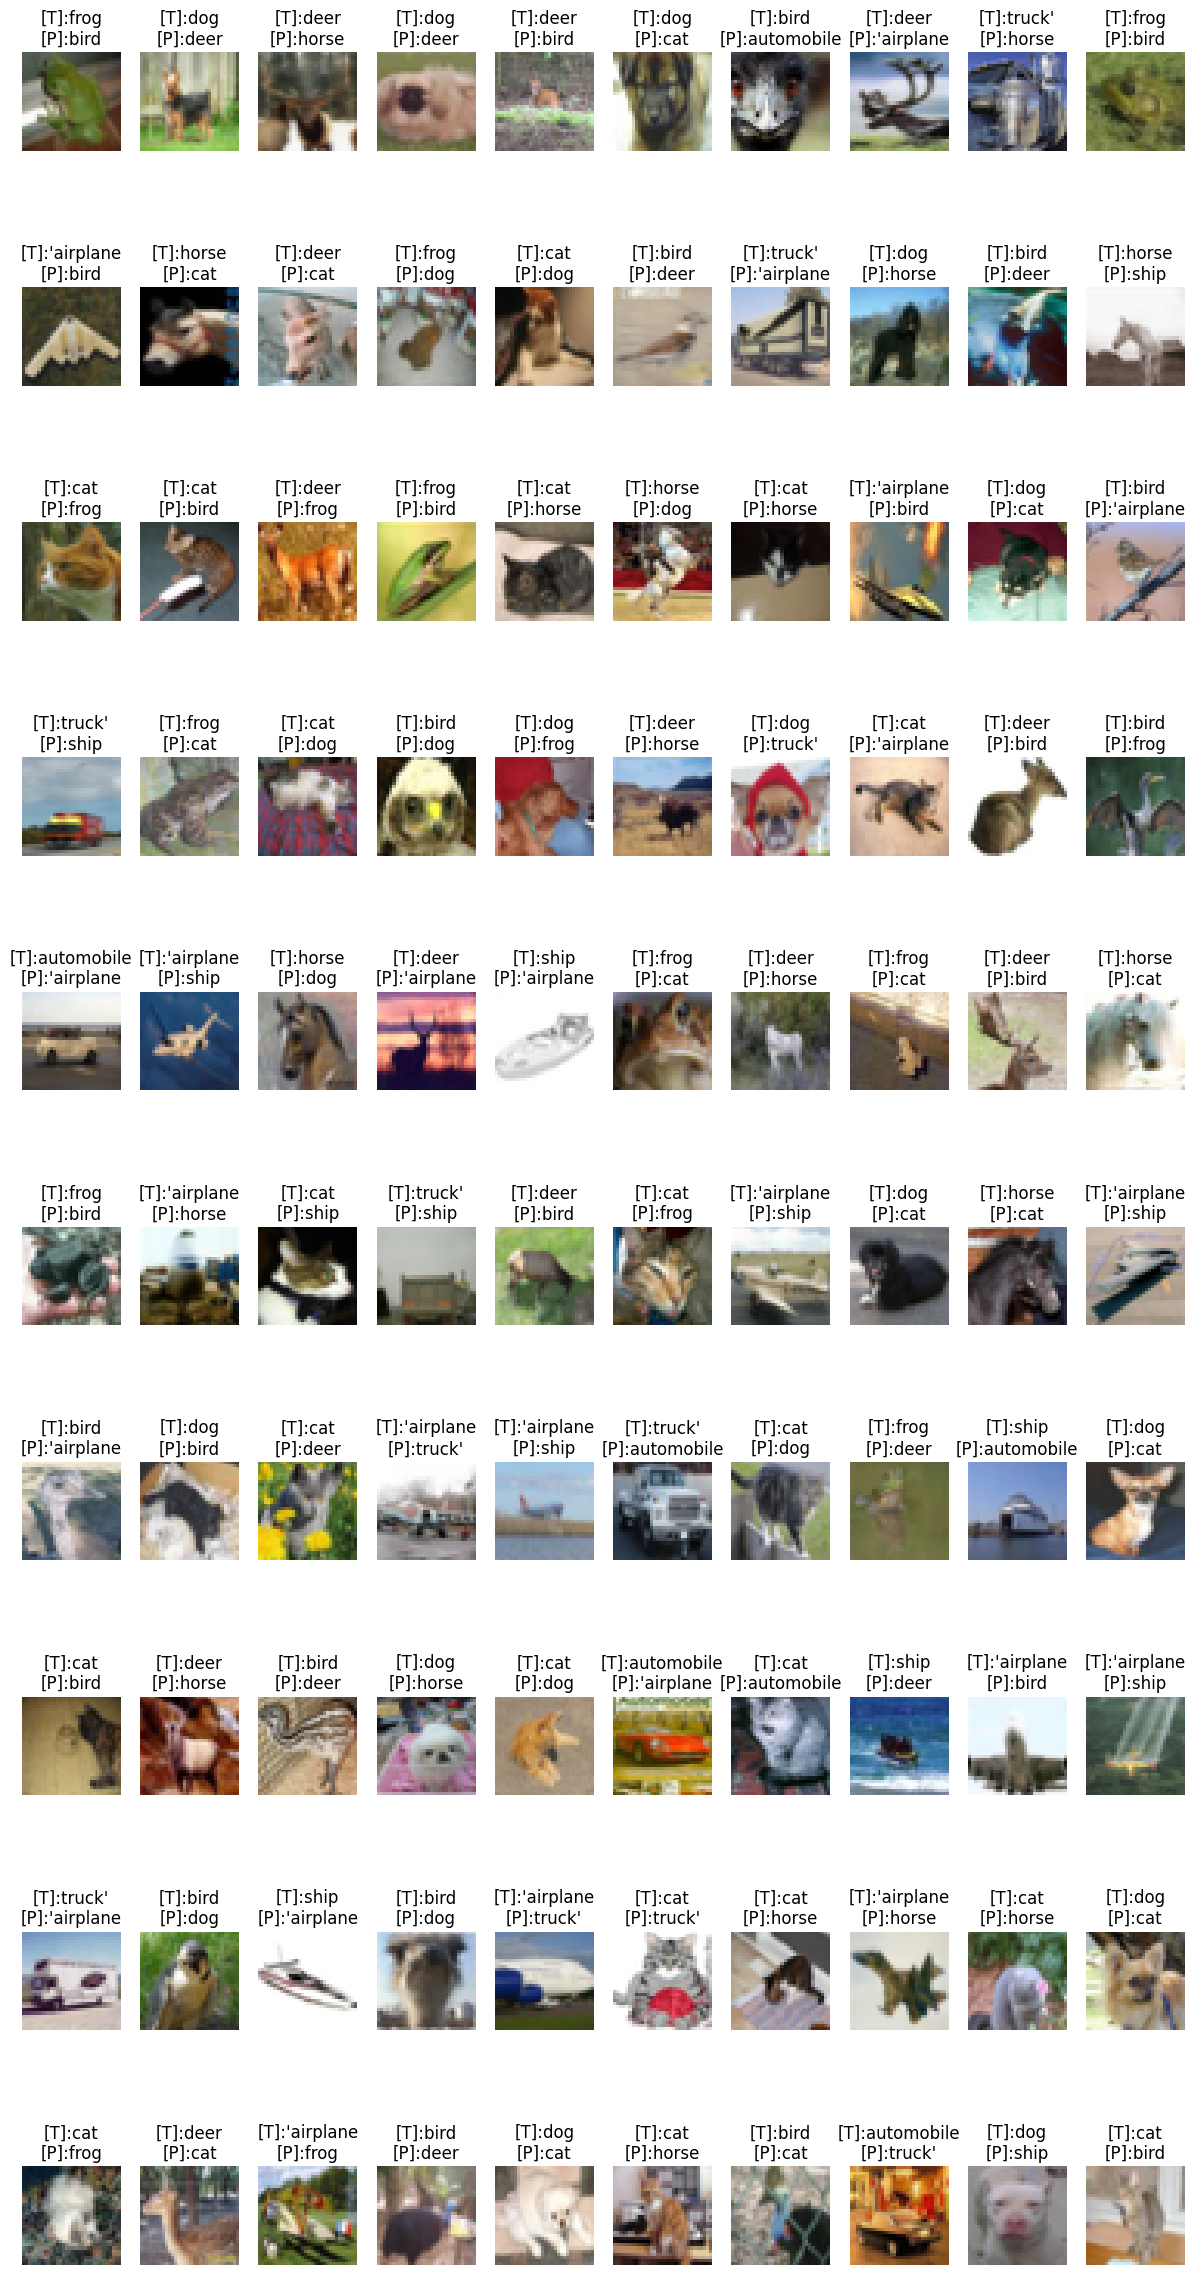

In [13]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
print(fp_pred)
# 預測錯誤的真實值
fp_true = y_test[idx]
print(fp_true)
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(lab_list[fp_true[i]], lab_list[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])
     

1/1 [==============================] - 0s 22ms/step
'airplane 的機率是: 0.0597
automobile 的機率是: 0.2831
bird 的機率是: 0.0818
cat 的機率是: 0.024
deer 的機率是: 1e-04
dog 的機率是: 0.0065
frog 的機率是: 0.0002
horse 的機率是: 0.1803
ship 的機率是: 0.0303
truck' 的機率是: 0.3341
最高機率是: truck'


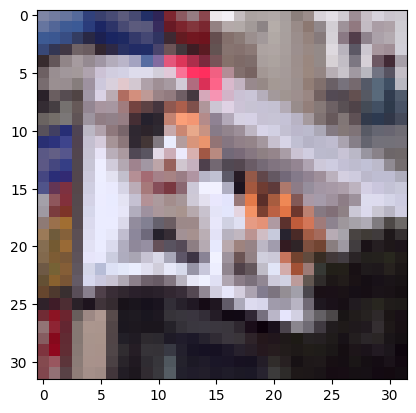

In [14]:
import requests
from PIL import Image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/aglzo4nc-1625740186.jpeg?crop=0.665xw:1.00xh;0.133xw,0&resize=640:*" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(lab_list[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", lab_list[ans])
plt.imshow(img_np)

1/1 [==============================] - 0s 47ms/step


<ipython-input-15-979b517efe49>:27: RuntimeWarning: invalid value encountered in true_divide
  fil = (fil - mi) / (ma - mi)


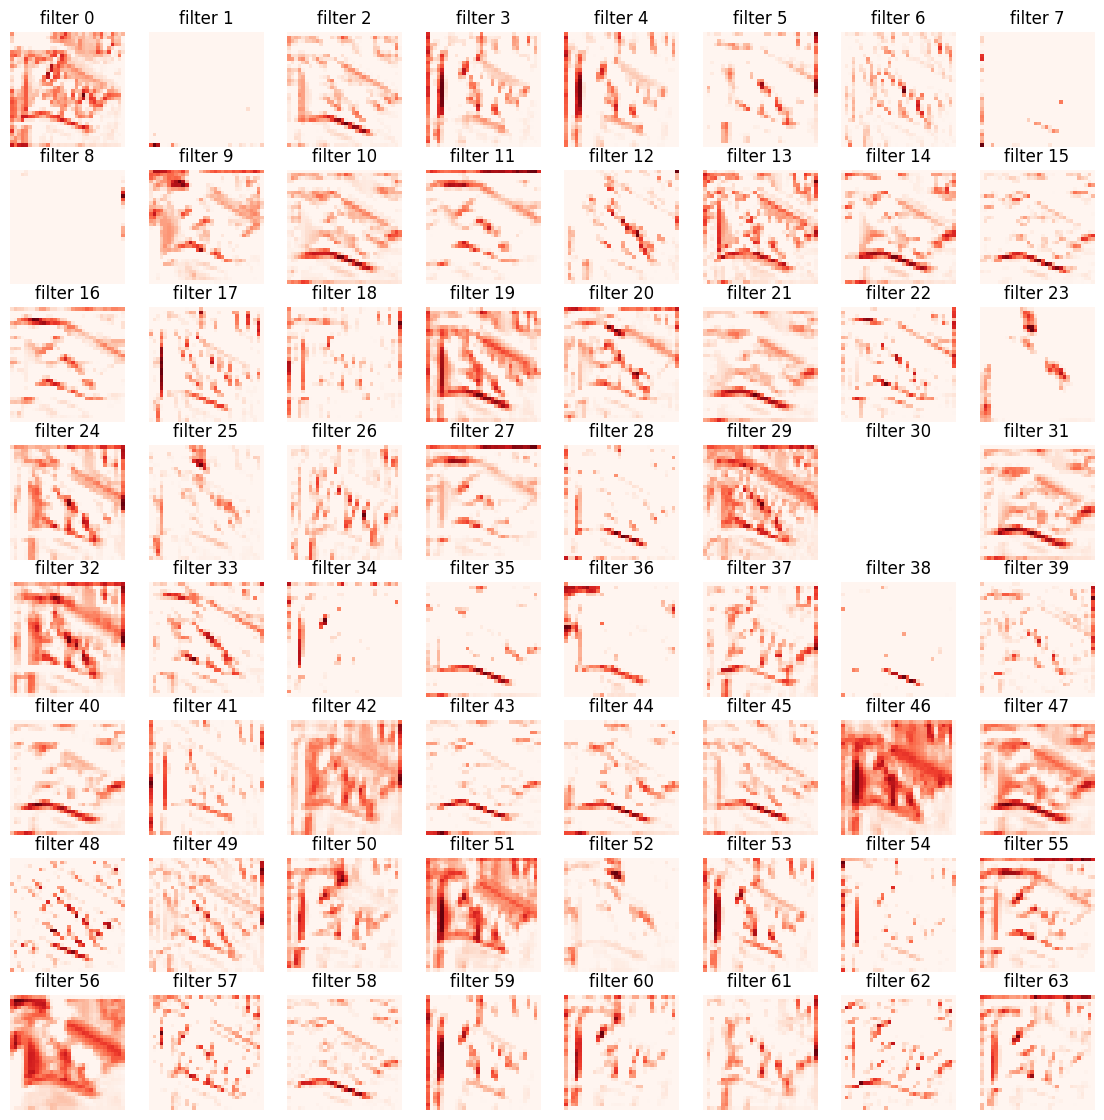

In [15]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")

In [16]:
# HDFVIEW 用來觀看權重
#　save model
import os
from tensorflow.keras.models import load_model
temp = load_model("cnn.h5")
temp.evaluate(x_test_norm, y_test)
# 儲存
model.save("cnn.h5")
# 有的話就讀, 沒有的話就建立模型
if not os.path.exists("cnn.h5"):
    # model = Sequential(layers)
    # model.compile(loss=xxx)
    pass
else:
    model = load_model("cnn.h5") 

313/313 [==============================] - 24s 75ms/step - loss: 0.6746 - accuracy: 0.7748
